In [28]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [29]:
gold_data=pd.read_csv("gld_price_data.csv")
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [30]:
gold_data.shape

(2290, 6)

In [31]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [32]:
gold_data.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [33]:
Q1 = gold_data['GLD'].quantile(0.25)
print(Q1)

109.72500025


In [34]:
Q3 = gold_data['GLD'].quantile(0.75)
print(Q3)

132.84000400000002


In [35]:
IQR = Q3 - Q1

In [36]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [37]:
df_clean = gold_data[(gold_data['GLD'] >= lower_bound) & (gold_data['GLD'] <= upper_bound)]

In [38]:
print("\nData after removing outliers:")
print(df_clean)


Data after removing outliers:
           Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2175 rows x 6 columns]


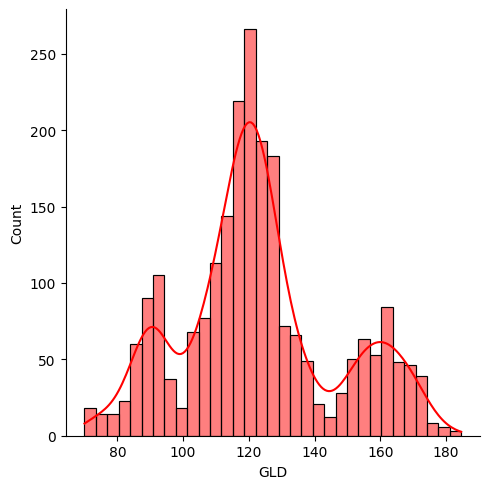

In [40]:
sns.displot(gold_data["GLD"], color="red", kde=True) 

In [41]:
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data["GLD"]

In [42]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [43]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


# Splitting into Traning and Test

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)  

# Model

In [47]:
regressor=RandomForestRegressor(n_estimators=10000)

In [48]:
regressor.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10000)

In [49]:
data_prediction=regressor.predict(x_test)

In [50]:
data_prediction

array([122.56907634, 130.21925893, 127.64659193,  97.62952114,
       118.9604854 , 114.59864037, 124.85864668, 117.87337165,
       107.93300315,  98.59395461,  95.79432683, 167.44504936,
       147.65438812, 115.96714567, 170.86572225,  85.2047462 ,
       124.21718701, 109.21699422, 112.30498263, 131.60657389,
       124.20471744, 113.5843227 , 115.5301637 , 108.75879981,
       107.98076073, 125.84379259, 119.24531567, 112.61352385,
       113.23064655, 126.13488309, 146.10382162,  89.22424584,
       167.50695251, 113.6108463 , 108.24694078, 120.27292584,
       141.50897951, 161.15000864, 173.80757661, 153.04232329,
       119.51214769, 111.32473678, 121.41326759, 113.70561533,
       122.09686799, 107.9929909 ,  88.11754292, 114.22037213,
       129.76899742, 117.89391206, 104.15034594, 129.83270061,
       107.30852602, 160.75245683, 131.66211569, 117.59076655,
       147.11170908, 136.37055168,  95.63307556, 124.65083049,
       114.69306954,  86.53534021, 104.28712112, 113.88

# Checking Predictions Score

In [51]:
score=metrics.r2_score(y_test,data_prediction)
score

0.9904280494375785

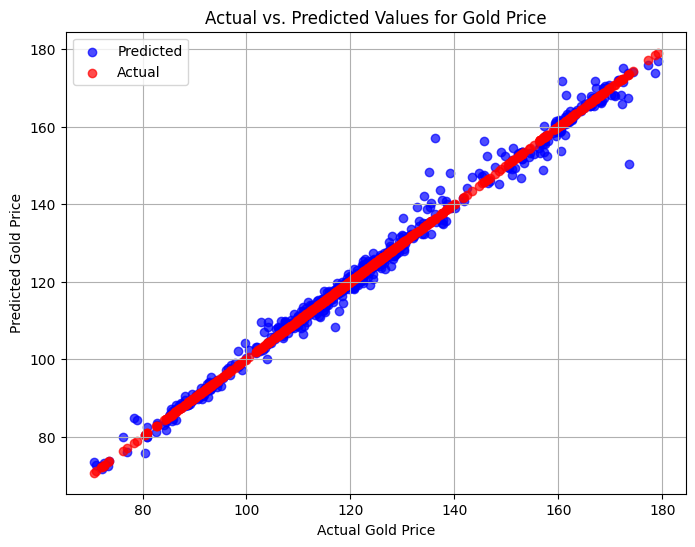

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, data_prediction, color='blue', label='Predicted', alpha=0.7)
plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.7)  # Plotting y = x line for comparison
plt.title('Actual vs. Predicted Values for Gold Price')
plt.xlabel('Actual Gold Price')
plt.ylabel('Predicted Gold Price')
plt.legend()
plt.grid(True)
plt.show()